# Use pandas-datareader Package to Get Financial Information
  
For this project, we use free APIs to get stock information. Some other commercial APIs are available on the internet, such as: https://intrinio.com/

In [ ]:
#install the package
!pip install pandas_datareader

In [4]:
#import packages
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data, wb

## 1. Get the list of stocks in Toronto Stock Exchange
The listings of TSX/TSXV has been downloaded from the following link:  
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=11&ved=2ahUKEwjC8Kf7jY3lAhVQh-AKHY1mBGYQFjAKegQIARAC&url=https%3A%2F%2Fwww.tsx.com%2Fresource%2Fen%2F571&usg=AOvVaw0t7ZrObTwMOVfTAbPG9YRQ

In [3]:
listings = pd.read_csv("tsx-andamp-tsxv-listed-companies-2019-09-13-en.csv", 
                       parse_dates=['Date of \nTSX Listing\nYYYYMMDD'])

In [4]:
listings.head()

,Co_ID,Exchange,Name,Root Ticker,QMV(C$) 31-August-2019,O/S Shares 31-August-2019,Sector,Sub Sector,Listing Type,Date of TSX Listing YYYYMMDD,...,Zinc,Rare Earths,Potash,Lithium,Uranium,Coal,Tungsten,Base & Precious Metals,Mineral Properties (General),Other Properties
0,FIV0003,TSX,5N Plus Inc.,VNP,"195,022,756","83,343,058",Clean Technology,NaN,IPO,2007-12-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAW0001,TSX,A&W Revenue Royalties Income Fund,AW,"571,728,957","14,064,673",Consumer Products & Services,NaN,NaN,2002-02-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FIR0005,TSX,Aberdeen Asia-Pacific Income Investment Compan...,FAP,"177,851,156","50,814,616",Closed-End Funds,NaN,NaN,1986-06-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABE0005,TSX,Aberdeen International Inc.,AAB,"4,802,614","96,052,282",Financial Services,NaN,TSXV Grad,2008-01-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS0003,TSX,Absolute Software Corporation,ABT,"328,576,276","41,697,497",Technology,NaN,TSXV Grad,2005-12-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
listings.columns

Index(['Co_ID', 'Exchange', 'Name', 'Root\nTicker',
       ' QMV(C$)\n31-August-2019 ', ' O/S Shares\n31-August-2019 ', 'Sector',
       'Sub\nSector', 'Listing Type', 'Date of \nTSX Listing\nYYYYMMDD',
       'HQ\nLocation', 'HQ\nRegion', 'Interlisted\nCode_I',
       'Interlisted\nCode_II', 'Listed on OTC', 'TSX \nVenture \nGrad',
       'Former\nCPC', 'Index', 'Clean Technology Primary Industry',
       'Clean Technology Sub-Sector', 'Technology Sub-Sector ',
       'Consumer Products & Services\nSub-Sector', 'Real Estate Sub-Sector ',
       'Life Sciences Sub-Sector', 'USA_City', 'USA_State', 'Asia Region',
       'Israel Related', 'Place of Incorporation\nC=Canada\nU=USA\nF=Foreign',
       'Fund Family', 'SP Grouping', 'SP_Type', 'SP_Sub',
       'Income Trust \nConversion', ' Volume YTD\n31-August-2019 ',
       ' Value (C$) YTD\n31-August-2019 ',
       ' Number of \nTrades YTD\n31-August-2019 ',
       ' Number of\nMonths of \nTrading Data ', 'AFRICA', 'AUS/NZ/PNG',
       'C

  
    
The Ticker of National Bank of Canada is "NA", and it was read as NaN by pandas read_csv methods. Here we fixed it manually.

In [6]:
listings[listings['Root\nTicker'].apply(lambda x: type(x)) == float]

,Co_ID,Exchange,Name,Root Ticker,QMV(C$) 31-August-2019,O/S Shares 31-August-2019,Sector,Sub Sector,Listing Type,Date of TSX Listing YYYYMMDD,...,Zinc,Rare Earths,Potash,Lithium,Uranium,Coal,Tungsten,Base & Precious Metals,Mineral Properties (General),Other Properties
1086,NAT0002,TSX,National Bank of Canada,NaN,"22,993,740,736","433,577,427",Financial Services,NaN,NaN,1979-11-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
listings.loc[listings.Co_ID == 'NAT0002', 'Root\nTicker'] = 'NA'

Only keep a few key columns and rename them. Change data types accordingly.

In [8]:
keep_cols = ['Exchange', 'Name', 'Root\nTicker',
       ' QMV(C$)\n31-August-2019 ', 'Sector','Date of \nTSX Listing\nYYYYMMDD']
listings = listings[keep_cols]
listings.columns = ['exchange', 'name', 'ticker',
       'market_value', 'sector','date_of_listing']

In [9]:
listings['exchange']= listings['exchange'].apply(lambda x: x.strip())
listings['name']= listings['name'].apply(lambda x: x.strip())
listings['ticker']= listings['ticker'].apply(lambda x: x.strip())
listings['sector']= listings['sector'].apply(lambda x: x.strip())
listings['market_value']= listings['market_value'].apply(
    lambda x: x.strip()).apply(lambda x: x.replace(',',''))
                                             
listings['market_value'] = pd.to_numeric(listings['market_value'])

listings.set_index('ticker', inplace = True)

Remove the ETPs (Exchange-Traded Products) cause they have different data structures as the regular company's stocks.

In [10]:
listings.sector.value_counts()

ETP                               680
Mining                            213
Industrial Products & Services    123
Closed-End Funds                   92
Financial Services                 73
Consumer Products & Services       70
Oil & Gas                          70
Real Estate                        61
Life Sciences                      56
Technology                         51
Clean Technology                   31
Comm & Media                       23
Utilities & Pipelines              21
SPAC                                2
Name: sector, dtype: int64

Keep only the stocks listed before 2004. Save to csv file for future use.

In [11]:
listings[(listings.sector != 'ETP') & (listings.date_of_listing < '2004')].to_csv('TSX_listing_2004.csv')

## 2. Get the stock prices

In [12]:
listings = listings[(listings.sector != 'ETP') & (listings.date_of_listing < '2004')]

In [20]:
listings.index[1]

'FAP'

In [5]:
from datetime import date
import requests
from time import sleep

In [2]:
def get_stock(symbol):
    '''
    Get stock daily adjuested close price and volume using alphavantage API
    '''
    apikey = "39ID5KS0RJQLNZGL"
    base_url = "https://www.alphavantage.co/query?"
    function = "TIME_SERIES_DAILY_ADJUSTED"
    outputsize = "full"
    
    #construct the api url
    url = base_url + "function={}&symbol={}&outputsize={}&apikey={}".format(
    function, symbol, outputsize, apikey)

    r = requests.get(url)
    
    #parse the result, change the datatypes 
    try:
        df = pd.DataFrame(r.json()['Time Series (Daily)']).transpose(
            )[['5. adjusted close','6. volume']].reset_index()
    except:
        return None
    df.columns = ['date','price','volume']
    df['date'] = pd.to_datetime(df['date'])
    df['price'] = pd.to_numeric(df['price'])
    df['volume'] = pd.to_numeric(df['volume'])
    df = df.set_index('date')
    
    return df

In [220]:
df_price = get_stock(listings.index[1]+".TO")[['price']]
df_volume = get_stock(listings.index[1]+".TO")[['volume']]

In [221]:
df_price.head()

,price
date,
2019-10-08,3.35
2019-10-07,3.39
2019-10-04,3.38
2019-10-03,3.35
2019-10-02,3.38


In [222]:
df_volume.head()

,volume
date,
2019-10-08,33950
2019-10-07,56200
2019-10-04,30900
2019-10-03,56200
2019-10-02,44000


In [223]:
#This cell scrap the entire list, so it will take very long to finish
'''
for i, _ in listings.iterrows():
    df = get_stock(i+".TO")
    sleep(10)
    if df is not None:
        df_price = df_price.join(df['price'],rsuffix = i)
        df_volume = df_volume.join(df['volume'],rsuffix = i)
        print("get info of {}".format(i))
    else:
        print("failed to get {}".format(i))
'''

failed to get AW
get info of FAP
failed to get ACD
failed to get DRX
get info of AAV
get info of ARE
failed to get AEZS
failed to get AGF
get info of AJX
get info of AEM
get info of BOS
failed to get AKT
get info of ASR
failed to get ALC
get info of AQN
failed to get ATD
failed to get AP
failed to get AMM
get info of ALA
failed to get ADW
get info of APS
get info of ARX
failed to get ACO
get info of ATA
failed to get AVP
get info of BAD
get info of BLDP
get info of BMO
get info of BNS
get info of ABX
get info of BHC
get info of BTE
get info of BCE
failed to get BEK
failed to get BXE
failed to get BLU
get info of BR
get info of BB
failed to get RBN
get info of GBT
failed to get BEI
failed to get BBD
get info of BNP
get info of BNE
get info of BLX
failed to get BPF
failed to get BYD
failed to get BBL
get info of BRE
failed to get BAM
failed to get BPO
failed to get BEP
failed to get BUI
get info of CAE
failed to get CWL
failed to get CAL
get info of CFW
get info of CGY
get info of CCO
fa

In [224]:
df_price.head()

,price,priceFAP,priceAAV,priceARE,priceAJX,priceAEM,priceBOS,priceASR,priceAQN,priceALA,...,priceWDO,priceWFT,priceWJA,priceWPRT,priceWTE,priceWPK,priceYRI,priceY,priceYRB,priceZAR
date,,,,,,,,,,,,,,,,,,,,,
2019-10-08,3.35,3.35,1.89,17.69,0.56,73.25,7.50,5.90,NaN,19.00,...,6.58,49.37,30.62,3.27,20.22,45.64,4.66,8.90,0.03,0.32
2019-10-07,3.39,3.39,1.90,17.62,0.53,72.02,7.70,5.64,18.75,19.18,...,6.25,50.00,30.63,3.37,20.36,45.83,4.51,8.28,0.03,0.33
2019-10-04,3.38,3.38,1.99,17.71,0.52,72.34,7.68,5.67,18.55,18.95,...,6.35,51.62,30.61,3.40,19.03,45.54,4.60,8.43,0.03,0.36
2019-10-03,3.35,3.35,2.03,17.61,0.51,71.28,7.60,5.54,18.32,18.93,...,6.21,51.42,30.60,3.29,19.30,45.98,4.50,8.32,0.03,0.36
2019-10-02,3.38,3.38,2.03,17.69,0.49,71.21,7.74,5.51,18.01,19.22,...,6.22,51.01,30.64,3.30,19.29,46.69,4.45,8.22,0.03,0.36


In [225]:
df_volume.head()

,volume,volumeFAP,volumeAAV,volumeARE,volumeAJX,volumeAEM,volumeBOS,volumeASR,volumeAQN,volumeALA,...,volumeWDO,volumeWFT,volumeWJA,volumeWPRT,volumeWTE,volumeWPK,volumeYRI,volumeY,volumeYRB,volumeZAR
date,,,,,,,,,,,,,,,,,,,,,
2019-10-08,33950,33950,739872.0,531393,21009,587473,14915,816397.0,NaN,1076507.0,...,723387,299167,200145,25623,283884.0,53040,2200431,6422.0,100000,17832
2019-10-07,56200,56200,524600.0,214000,21500,478800,1300,632000.0,1485200.0,616800.0,...,581100,300700,158900,57000,317600.0,27300,1931600,1400.0,125000,46700
2019-10-04,30900,30900,815900.0,130600,9000,561800,7600,514800.0,1551100.0,862900.0,...,478200,231100,651100,22800,159600.0,69100,2234300,4300.0,0,100
2019-10-03,56200,56200,829500.0,296000,1000,773200,6700,539900.0,1615900.0,552700.0,...,401000,291800,430000,108600,281900.0,49300,3575800,1600.0,233000,4100
2019-10-02,44000,44000,505200.0,177700,13100,759800,11100,808300.0,1482700.0,1600600.0,...,575400,294600,284400,139800,268500.0,150400,2988600,6300.0,979400,12800


In [226]:
df_price.to_csv('price.csv')

In [227]:
df_volume.to_csv('volume.csv')

In [57]:
df = get_stock("TSE:FAP")

In [58]:
df.tail()

,price,volume
date,,
2000-01-10,1.3421,53800
2000-01-07,1.3755,42200
2000-01-06,1.3254,42500
2000-01-05,1.3171,38700
2000-01-04,1.3338,51300


In [59]:
import matplotlib.pyplot as plt

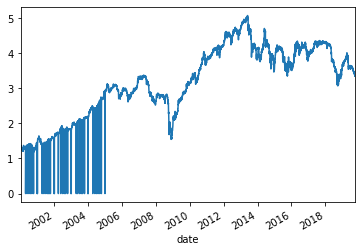

In [60]:
df.price.plot()

## 3. Get the important indices

In [14]:
from pandas_datareader.bankofcanada import BankOfCanadaReader
from pandas_datareader import DataReader

In [31]:
start = date(2005,1,1)
end = date(2019,9,30)
df = DataReader('AAPL', 'iex', start, end, api_key="pk_548fc57cbb4e4954b30376d9dedea5a5")

In [32]:
df.head()

,open,high,low,close,volume
date,,,,,
2014-10-10,100.69,102.03,100.30,100.73,66331592
2014-10-13,101.33,101.78,99.81,99.81,53583368
2014-10-14,100.39,100.52,98.57,98.75,63688562
2014-10-15,97.97,99.15,95.18,97.54,100933600
2014-10-16,95.55,97.72,95.41,96.26,72154523


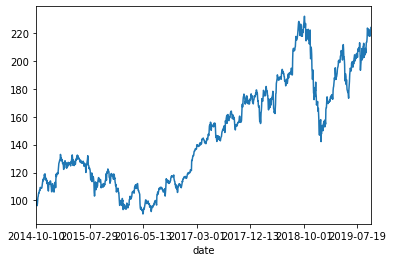

In [28]:
df.close.plot()

In [20]:
start = date(2004,1,1)
end = date(2019,9,30)
df = BankOfCanadaReader('lists', start = start, end = end)

In [212]:
df.read()

RemoteDataError: Unable to read URL: http://www.bankofcanada.ca/valet/observations/lists/csv?start_date=2004-01-01&end_date=2019-09-30
Response Text:
b'\xef\xbb\xbfSeries lists not found.\nhttps://www.bankofcanada.ca/valet/docs'

In [215]:
df = BankOfCanadaReader('V41690973', start = start, end = end)
df.read()

,V41690973
"date""",
2019-08-01,136.8
2019-07-01,137.0
2019-06-01,136.3
2019-05-01,136.6
2019-04-01,136.0
2019-03-01,135.4
2019-02-01,134.5
2019-01-01,133.6
2018-12-01,133.4


In [207]:
df = DataReader('DEXCAUS','fred', start = start, end = end)

In [208]:
df

,DEXCAUS
DATE,
2004-01-01,NaN
2004-01-02,1.2900
2004-01-05,1.2803
2004-01-06,1.2824
2004-01-07,1.2884
2004-01-08,1.2790
2004-01-09,1.2690
2004-01-12,1.2735
2004-01-13,1.2729
